In [2]:
%pip install opencv-python
%pip install pandas
%pip install matplotlib
%pip install PyWavelets
import cv2 as cv
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import warnings
import pywt
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.





C:\Users\kar\AppData\Local\Temp\ipykernel_18180\1553028327.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



    "id": 1,
    "name": "FR-II"

    "id": 2,
    "name": "FR-I"

    "id": 3,
    "name": "FR-X"

    "id": 4,
    "name": "R"

In [3]:
from compile import get_train_data, get_test_data

In [4]:
train_image_arr = get_train_data()[0]
test_image_arr = get_test_data()[0]
train_label = get_train_data()[-1]
test_label = get_test_data()[-1]

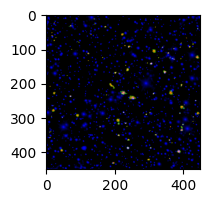

In [5]:
fig = plt.figure(figsize=(15, 2))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(train_image_arr[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


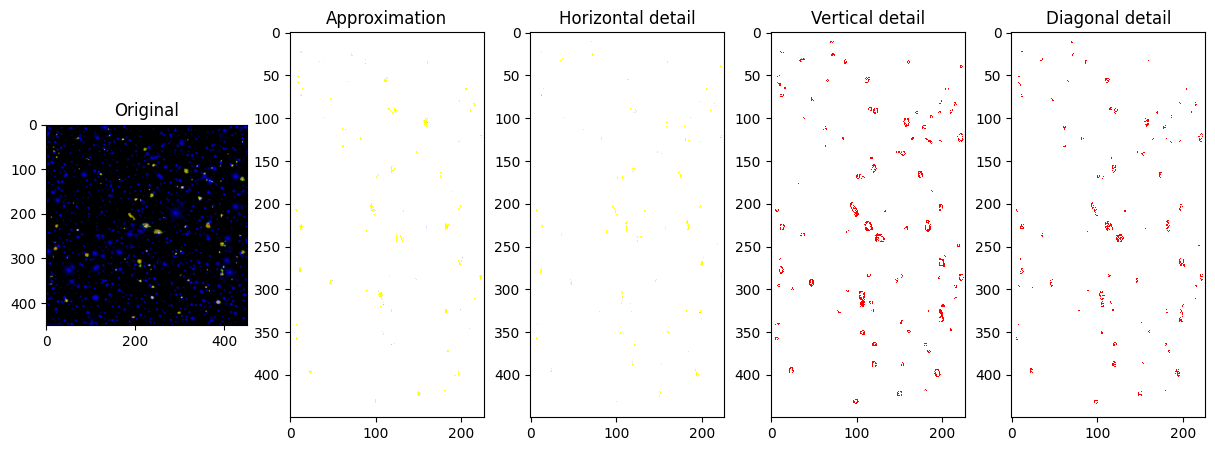

In [6]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(train_image_arr[0], 'bior1.3')
LL, (LH, HL, HH) = coeffs2

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

ax1.imshow(train_image_arr[0])
ax1.set_title("Original")
ax2.imshow(LL, interpolation="nearest") 
ax2.set_title("Approximation")
ax3.imshow(LH, interpolation="nearest") 
ax3.set_title("Horizontal detail")
ax4.imshow(HL, interpolation="nearest") 
ax4.set_title("Vertical detail")
ax5.imshow(HH, interpolation="nearest") 
ax5.set_title("Diagonal detail")
plt.show()

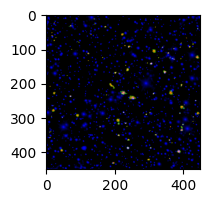

In [7]:
fig = plt.figure(figsize=(15, 2))
plt.imshow(train_image_arr[0])
plt.show()

In [11]:
from collections import Counter
counts = Counter(train_label)
for value, count in counts.items():
    print(f"{value} occurs {count} times")

1 occurs 928 times
4 occurs 507 times
2 occurs 263 times
3 occurs 261 times
